<a href="https://colab.research.google.com/github/varalakshmiarcot/Storedata_Apriori/blob/master/Storedata_apriori.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np 
import pandas as pd 
from mlxtend.frequent_patterns import apriori, association_rules 
from mlxtend.preprocessing import TransactionEncoder
import warnings
warnings.filterwarnings('ignore')

In [0]:
store_data = pd.read_csv('https://raw.githubusercontent.com/varalakshmiarcot/Storedata_Apriori/master/store_data.csv', header=None)
store_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
store_data = pd.read_csv('/content/store_data.csv', header=None)
store_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
df_Store = pd.DataFrame({'Transaction':[],'Item':[]})
rows = store_data.shape[0]
for row in range(rows):
  items =  store_data.loc[row].dropna()
  noOfItems = len(items)
  df_Temp = pd.DataFrame({'Transaction':[row]* noOfItems,'Item':items})
  df_Store= df_Store.append(df_Temp,sort =None, ignore_index=True)
df_Store['Transaction'] = df_Store['Transaction'].astype('int')

In [0]:
df_Store

,Transaction,Item
0,0,shrimp
1,0,almonds
2,0,avocado
3,0,vegetables mix
4,0,green grapes
...,...,...
29358,7499,green tea
29359,7500,eggs
29360,7500,frozen smoothie
29361,7500,yogurt cake


In [0]:
df_Store = df_Store.drop(df_Store[df_Store.Item  == 0].index)
df_Store

,Transaction,Item
0,0,shrimp
1,0,almonds
2,0,avocado
3,0,vegetables mix
4,0,green grapes
...,...,...
29358,7499,green tea
29359,7500,eggs
29360,7500,frozen smoothie
29361,7500,yogurt cake


In [0]:
hot_encoded_storedata= df_Store.groupby(['Transaction','Item'])['Item'].count().unstack().reset_index().fillna(0).set_index('Transaction')
hot_encoded_storedata.head()

Item,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,body spray,bramble,brownies,bug spray,burger sauce,burgers,butter,cake,candy bars,carrots,cauliflower,cereals,champagne,chicken,chili,chocolate,chocolate bread,chutney,cider,clothes accessories,cookies,cooking oil,corn,cottage cheese,cream,dessert wine,eggplant,eggs,energy bar,energy drink,...,oil,olive oil,pancakes,parmesan cheese,pasta,pepper,pet food,pickles,protein bar,red wine,rice,salad,salmon,salt,sandwich,shallot,shampoo,shrimp,soda,soup,spaghetti,sparkling water,spinach,strawberries,strong cheese,tea,tomato juice,tomato sauce,tomatoes,toothpaste,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
Transaction,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [0]:
def encode_units(x):
    if x <=  0:
        return 0
    if x >=  1:
        return 1
hot_encoded_storedata  = hot_encoded_storedata.applymap(encode_units)

In [0]:
hot_encoded_storedata.head()

Item,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,body spray,bramble,brownies,bug spray,burger sauce,burgers,butter,cake,candy bars,carrots,cauliflower,cereals,champagne,chicken,chili,chocolate,chocolate bread,chutney,cider,clothes accessories,cookies,cooking oil,corn,cottage cheese,cream,dessert wine,eggplant,eggs,energy bar,energy drink,...,oil,olive oil,pancakes,parmesan cheese,pasta,pepper,pet food,pickles,protein bar,red wine,rice,salad,salmon,salt,sandwich,shallot,shampoo,shrimp,soda,soup,spaghetti,sparkling water,spinach,strawberries,strong cheese,tea,tomato juice,tomato sauce,tomatoes,toothpaste,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
Transaction,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [0]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

frequent_itemsets  =  apriori(hot_encoded_storedata , min_support = 0.01, use_colnames = True)

In [0]:
rules  =  association_rules(frequent_itemsets, metric = "lift", min_threshold = 1)
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(avocado),(mineral water),0.033329,0.238368,0.011598,0.348000,1.459926,0.003654,1.168147
1,(mineral water),(avocado),0.238368,0.033329,0.011598,0.048658,1.459926,0.003654,1.016113
2,(cake),(burgers),0.081056,0.087188,0.011465,0.141447,1.622319,0.004398,1.063198
3,(burgers),(cake),0.087188,0.081056,0.011465,0.131498,1.622319,0.004398,1.058080
4,(chocolate),(burgers),0.163845,0.087188,0.017064,0.104150,1.194537,0.002779,1.018933
5,(burgers),(chocolate),0.087188,0.163845,0.017064,0.195719,1.194537,0.002779,1.039630
6,(eggs),(burgers),0.179709,0.087188,0.028796,0.160237,1.837830,0.013128,1.086988
7,(burgers),(eggs),0.087188,0.179709,0.028796,0.330275,1.837830,0.013128,1.224818
8,(french fries),(burgers),0.170911,0.087188,0.021997,0.128705,1.476173,0.007096,1.047650
9,(burgers),(french fries),0.087188,0.170911,0.021997,0.252294,1.476173,0.007096,1.108844


In [0]:
rules.sort_values('lift', ascending  =  False, inplace  =  True)
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
215,(herb & pepper),(ground beef),0.049460,0.098254,0.015998,0.323450,3.291994,0.011138,1.332860
214,(ground beef),(herb & pepper),0.098254,0.049460,0.015998,0.162822,3.291994,0.011138,1.135410
383,"(spaghetti, mineral water)",(ground beef),0.059725,0.098254,0.017064,0.285714,2.907928,0.011196,1.262445
386,(ground beef),"(spaghetti, mineral water)",0.098254,0.059725,0.017064,0.173677,2.907928,0.011196,1.137902
398,(olive oil),"(spaghetti, mineral water)",0.065858,0.059725,0.010265,0.155870,2.609786,0.006332,1.113898
395,"(spaghetti, mineral water)",(olive oil),0.059725,0.065858,0.010265,0.171875,2.609786,0.006332,1.128021
193,(tomatoes),(frozen vegetables),0.068391,0.095321,0.016131,0.235867,2.474464,0.009612,1.183930
192,(frozen vegetables),(tomatoes),0.095321,0.068391,0.016131,0.169231,2.474464,0.009612,1.121381
189,(shrimp),(frozen vegetables),0.071457,0.095321,0.016664,0.233209,2.446574,0.009853,1.179825
188,(frozen vegetables),(shrimp),0.095321,0.071457,0.016664,0.174825,2.446574,0.009853,1.125268


In [0]:
rules = rules[rules['confidence']>= 0.50]
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
342,"(ground beef, eggs)",(mineral water),0.019997,0.238368,0.010132,0.506667,2.125563,0.005365,1.543848
376,"(milk, ground beef)",(mineral water),0.021997,0.238368,0.011065,0.503030,2.110308,0.005822,1.532552


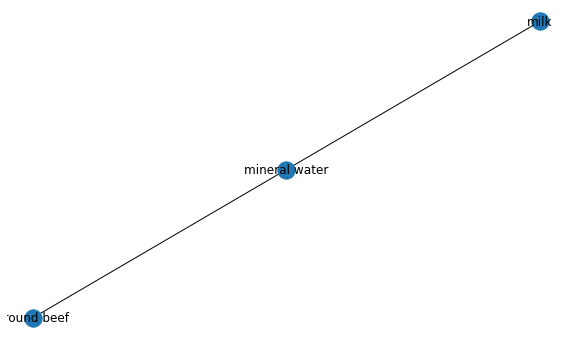

In [0]:
import networkx as nx
import matplotlib.pyplot as plt
rules.antecedents  =  rules.antecedents.apply(lambda x: next(iter(x)))
rules.consequents  =  rules.consequents.apply(lambda x: next(iter(x)))
fig, ax = plt.subplots(figsize = (10,6))
GA = nx.from_pandas_edgelist(rules,source = 'antecedents',target = 'consequents')
nx.draw(GA,with_labels = True)

mineral water is the bestseller of this store and it shows association with 2 items-milk, ground beef